In [35]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
caminho_dos_arquivos = 'dataset/*.xlsx'
lista_de_arquivos = glob.glob(caminho_dos_arquivos)
print(lista_de_arquivos)

['dataset\\INSE_2021_escolas.xlsx', 'dataset\\INSE_2021_estados.xlsx', 'dataset\\INSE_2021_municipios.xlsx', 'dataset\\INSE_2021__brasil.xlsx']


In [6]:
lista_de_dataframes = []
for arquivo in lista_de_arquivos:
    df = pd.read_excel(arquivo)
    lista_de_dataframes.append(df)

In [7]:
df_consolidado = pd.concat(lista_de_dataframes, ignore_index=True)

In [9]:
df_consolidado.columns

Index(['NU_ANO_SAEB', 'CO_UF', 'SG_UF', 'NO_UF', 'CO_MUNICIPIO',
       'NO_MUNICIPIO', 'ID_ESCOLA', 'NO_ESCOLA', 'TP_TIPO_REDE',
       'TP_LOCALIZACAO', 'TP_CAPITAL', 'QTD_ALUNOS_INSE', 'MEDIA_INSE',
       'INSE_CLASSIFICACAO', 'PC_NIVEL_1', 'PC_NIVEL_2', 'PC_NIVEL_3',
       'PC_NIVEL_4', 'PC_NIVEL_5', 'PC_NIVEL_6', 'PC_NIVEL_7', 'PC_NIVEL_8'],
      dtype='object')

In [10]:
colunas_relevantes = ['NU_ANO_SAEB', 'SG_UF', 'NO_UF', 'NO_MUNICIPIO', 'NO_ESCOLA', 'ID_ESCOLA', 'TP_TIPO_REDE', 'TP_CAPITAL','QTD_ALUNOS_INSE', 'MEDIA_INSE','INSE_CLASSIFICACAO', 'PC_NIVEL_1', 'PC_NIVEL_2', 'PC_NIVEL_3',
       'PC_NIVEL_4', 'PC_NIVEL_5', 'PC_NIVEL_6', 'PC_NIVEL_7', 'PC_NIVEL_8']
df_selecionado = df_consolidado[colunas_relevantes].copy()

In [11]:
df_selecionado.isnull().sum()

NU_ANO_SAEB               0
SG_UF                    63
NO_UF                    63
NO_MUNICIPIO           1764
NO_ESCOLA             84594
ID_ESCOLA             84594
TP_TIPO_REDE              0
TP_CAPITAL                0
QTD_ALUNOS_INSE           0
MEDIA_INSE                0
INSE_CLASSIFICACAO    84594
PC_NIVEL_1            27430
PC_NIVEL_2            27430
PC_NIVEL_3            27430
PC_NIVEL_4            27430
PC_NIVEL_5            27430
PC_NIVEL_6            27430
PC_NIVEL_7            27430
PC_NIVEL_8            27430
dtype: int64

In [12]:
df_tratado = df_selecionado.copy()

In [13]:
df_tratado.dropna(subset=['SG_UF', 'NO_UF', 'NO_MUNICIPIO'], inplace=True)
print(f"Número de linhas após remover NaN em UF e Município: {len(df_tratado)}")

Número de linhas após remover NaN em UF e Município: 152650


In [14]:
df_tratado.drop(columns=['NO_ESCOLA', 'ID_ESCOLA', 'INSE_CLASSIFICACAO'], inplace=True, errors='ignore')
print(f"Colunas após remover NO_ESCOLA, ID_ESCOLA, INSE_CLASSIFICACAO: {df_tratado.columns.tolist()}")

Colunas após remover NO_ESCOLA, ID_ESCOLA, INSE_CLASSIFICACAO: ['NU_ANO_SAEB', 'SG_UF', 'NO_UF', 'NO_MUNICIPIO', 'TP_TIPO_REDE', 'TP_CAPITAL', 'QTD_ALUNOS_INSE', 'MEDIA_INSE', 'PC_NIVEL_1', 'PC_NIVEL_2', 'PC_NIVEL_3', 'PC_NIVEL_4', 'PC_NIVEL_5', 'PC_NIVEL_6', 'PC_NIVEL_7', 'PC_NIVEL_8']


In [15]:
df_tratado.dropna(subset=['PC_NIVEL_1', 'PC_NIVEL_2', 'PC_NIVEL_3', 'PC_NIVEL_4', 'PC_NIVEL_5', 'PC_NIVEL_6', 'PC_NIVEL_7', 'PC_NIVEL_8'], inplace=True)
print(f"Número de linhas após remover NaN nos percentuais de INSE: {len(df_tratado)}")

Número de linhas após remover NaN nos percentuais de INSE: 125405


In [16]:
print("\nValores faltantes após o tratamento:")
print(df_tratado.isnull().sum())


Valores faltantes após o tratamento:
NU_ANO_SAEB        0
SG_UF              0
NO_UF              0
NO_MUNICIPIO       0
TP_TIPO_REDE       0
TP_CAPITAL         0
QTD_ALUNOS_INSE    0
MEDIA_INSE         0
PC_NIVEL_1         0
PC_NIVEL_2         0
PC_NIVEL_3         0
PC_NIVEL_4         0
PC_NIVEL_5         0
PC_NIVEL_6         0
PC_NIVEL_7         0
PC_NIVEL_8         0
dtype: int64


In [17]:
df_tratado['MEDIA_INSE'] = pd.to_numeric(df_tratado['MEDIA_INSE'], errors='coerce')
print(df_tratado['MEDIA_INSE'].dtypes)
print(df_tratado['MEDIA_INSE'].isnull().sum())

float64
0


In [19]:
print(df_tratado.describe())

       NU_ANO_SAEB   TP_TIPO_REDE     TP_CAPITAL  QTD_ALUNOS_INSE  \
count     125405.0  125405.000000  125405.000000    125405.000000   
mean        2021.0       3.259192       1.927044       275.672988   
std            0.0       1.326055       0.260065      2036.478301   
min         2021.0       1.000000       1.000000         1.000000   
25%         2021.0       2.000000       2.000000        37.000000   
50%         2021.0       3.000000       2.000000        79.000000   
75%         2021.0       3.000000       2.000000       173.000000   
max         2021.0       6.000000       2.000000    233700.000000   

          MEDIA_INSE     PC_NIVEL_1     PC_NIVEL_2     PC_NIVEL_3  \
count  125405.000000  125405.000000  125405.000000  125405.000000   
mean        4.771408       2.500708      17.344796      18.416982   
std         0.535976       5.385623      15.808522       9.946696   
min         2.450000       0.000000       0.000000       0.000000   
25%         4.360000       0.0000

In [21]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125405 entries, 0 to 154350
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NU_ANO_SAEB      125405 non-null  int64  
 1   SG_UF            125405 non-null  object 
 2   NO_UF            125405 non-null  object 
 3   NO_MUNICIPIO     125405 non-null  object 
 4   TP_TIPO_REDE     125405 non-null  int64  
 5   TP_CAPITAL       125405 non-null  int64  
 6   QTD_ALUNOS_INSE  125405 non-null  int64  
 7   MEDIA_INSE       125405 non-null  float64
 8   PC_NIVEL_1       125405 non-null  float64
 9   PC_NIVEL_2       125405 non-null  float64
 10  PC_NIVEL_3       125405 non-null  float64
 11  PC_NIVEL_4       125405 non-null  float64
 12  PC_NIVEL_5       125405 non-null  float64
 13  PC_NIVEL_6       125405 non-null  float64
 14  PC_NIVEL_7       125405 non-null  float64
 15  PC_NIVEL_8       125405 non-null  float64
dtypes: float64(9), int64(4), object(3)
memory u

In [22]:
df_tratado.describe()

,NU_ANO_SAEB,TP_TIPO_REDE,TP_CAPITAL,QTD_ALUNOS_INSE,MEDIA_INSE,PC_NIVEL_1,PC_NIVEL_2,PC_NIVEL_3,PC_NIVEL_4,PC_NIVEL_5,PC_NIVEL_6,PC_NIVEL_7,PC_NIVEL_8
count,125405.0,125405.000000,125405.000000,125405.000000,125405.000000,125405.000000,125405.000000,125405.000000,125405.000000,125405.000000,125405.00000,125405.000000,125405.000000
mean,2021.0,3.259192,1.927044,275.672988,4.771408,2.500708,17.344796,18.416982,21.376659,18.932533,12.58965,8.057852,0.780706
std,0.0,1.326055,0.260065,2036.478301,0.535976,5.385623,15.808522,9.946696,8.325906,9.720793,9.78596,8.741854,1.567472
min,2021.0,1.000000,1.000000,1.000000,2.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2021.0,2.000000,2.000000,37.000000,4.360000,0.000000,4.250000,10.520000,16.410000,11.510000,4.36000,1.280000,0.000000
50%,2021.0,3.000000,2.000000,79.000000,4.790000,0.230000,12.200000,18.460000,21.470000,19.440000,10.67000,5.000000,0.000000
75%,2021.0,3.000000,2.000000,173.000000,5.200000,2.990000,27.990000,25.410000,26.240000,25.990000,20.00000,12.640000,1.050000
max,2021.0,6.000000,2.000000,233700.000000,6.850000,100.000000,100.000000,100.000000,100.000000,100.000000,90.60000,100.000000,37.720000


In [24]:
media_inse_por_uf_arredondado = df_tratado.groupby('SG_UF')['MEDIA_INSE'].mean().round(2)
print("Média do INSE por UF (arredondado para 2 casas decimais):")
print(media_inse_por_uf_arredondado)

Média do INSE por UF (arredondado para 2 casas decimais):
SG_UF
AC    4.37
AL    4.28
AM    4.18
AP    4.43
BA    4.43
CE    4.28
DF    5.30
ES    4.95
GO    5.00
MA    4.11
MG    4.92
MS    5.02
MT    4.96
PA    4.14
PB    4.35
PE    4.40
PI    4.19
PR    5.23
RJ    4.91
RN    4.49
RO    4.80
RR    4.39
RS    5.35
SC    5.45
SE    4.30
SP    5.27
TO    4.57
Name: MEDIA_INSE, dtype: float64


In [25]:
contagem_por_tipo_rede = df_tratado.groupby('TP_TIPO_REDE').size()
print("\nContagem de registros por Tipo de Rede:")
print(contagem_por_tipo_rede)


Contagem de registros por Tipo de Rede:
TP_TIPO_REDE
1      941
2    37713
3    57912
5    14418
6    14421
dtype: int64


In [29]:
tipo_rede_mapping = {
    1: 'Federal',
    3: 'Estadual',
    4: 'Municipal',
    5: 'Privada Lucrativa',
    6: 'Privada Não Lucrativa'
}
df_tratado['TIPO_REDE_NOME'] = df_tratado['TP_TIPO_REDE'].map(tipo_rede_mapping)
print(df_tratado['TIPO_REDE_NOME'].value_counts())

TIPO_REDE_NOME
Estadual                 57912
Privada Não Lucrativa    14421
Privada Lucrativa        14418
Federal                    941
Name: count, dtype: int64


In [30]:
if 'TIPO_REDE_NOME' in df_tratado.columns:
    media_percentuais_por_rede_nome = df_tratado.groupby('TIPO_REDE_NOME')[['PC_NIVEL_1', 'PC_NIVEL_2', 'PC_NIVEL_3', 'PC_NIVEL_4', 'PC_NIVEL_5', 'PC_NIVEL_6', 'PC_NIVEL_7', 'PC_NIVEL_8']].mean().round(2)
    print("\nMédia dos percentuais de INSE por Tipo de Rede (Nome):")
    print(media_percentuais_por_rede_nome)
else:
    media_percentuais_por_rede_codigo = df_tratado.groupby('TP_TIPO_REDE')[['PC_NIVEL_1', 'PC_NIVEL_2', 'PC_NIVEL_3', 'PC_NIVEL_4', 'PC_NIVEL_5', 'PC_NIVEL_6', 'PC_NIVEL_7', 'PC_NIVEL_8']].mean().round(2)
    print("\nMédia dos percentuais de INSE por Tipo de Rede (Código):")
    print(media_percentuais_por_rede_codigo)


Média dos percentuais de INSE por Tipo de Rede (Nome):
                       PC_NIVEL_1  PC_NIVEL_2  PC_NIVEL_3  PC_NIVEL_4  \
TIPO_REDE_NOME                                                          
Estadual                     2.88       18.87       19.68       21.91   
Federal                      0.55        9.61       13.11       16.73   
Privada Lucrativa            2.43       17.61       18.47       21.20   
Privada Não Lucrativa        2.42       17.59       18.45       21.18   

                       PC_NIVEL_5  PC_NIVEL_6  PC_NIVEL_7  PC_NIVEL_8  
TIPO_REDE_NOME                                                         
Estadual                    18.16       11.20        6.66        0.64  
Federal                     19.64       18.34       19.32        2.69  
Privada Lucrativa           18.83       12.59        8.10        0.77  
Privada Não Lucrativa       18.83       12.61        8.13        0.77  


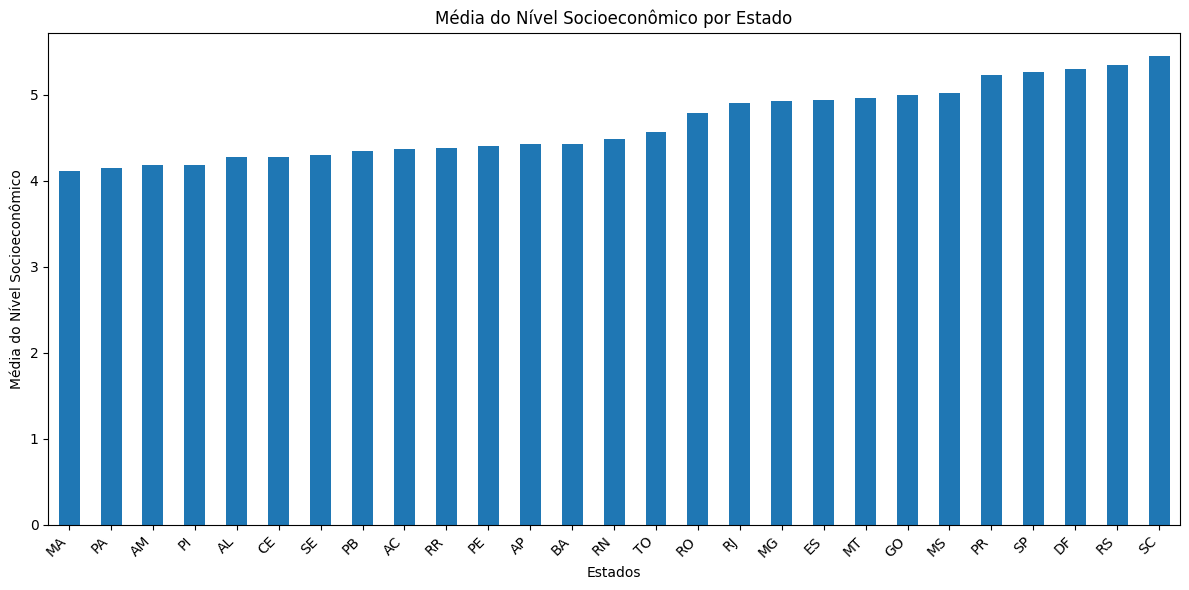

In [34]:
plt.figure(figsize=(12, 6))
media_inse_por_uf.sort_values().plot(kind='bar')
plt.title('Média do Nível Socioeconômico por Estado')
plt.xlabel('Estados')
plt.ylabel('Média do Nível Socioeconômico')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

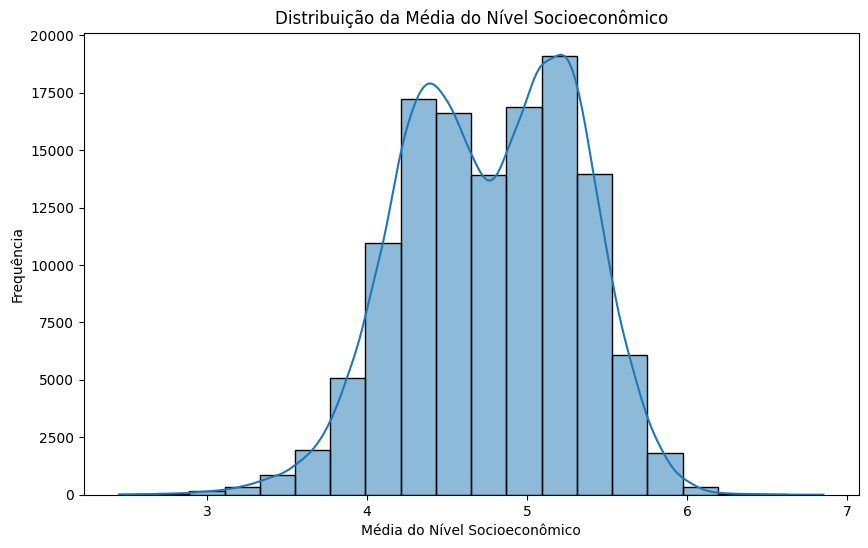

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df_tratado['MEDIA_INSE'], bins=20, kde=True)
plt.title('Distribuição da Média do Nível Socioeconômico')
plt.xlabel('Média do Nível Socioeconômico')
plt.ylabel('Frequência')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_2816\3749722852.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_inse_por_rede.index, y=media_inse_por_rede.values, palette='viridis')


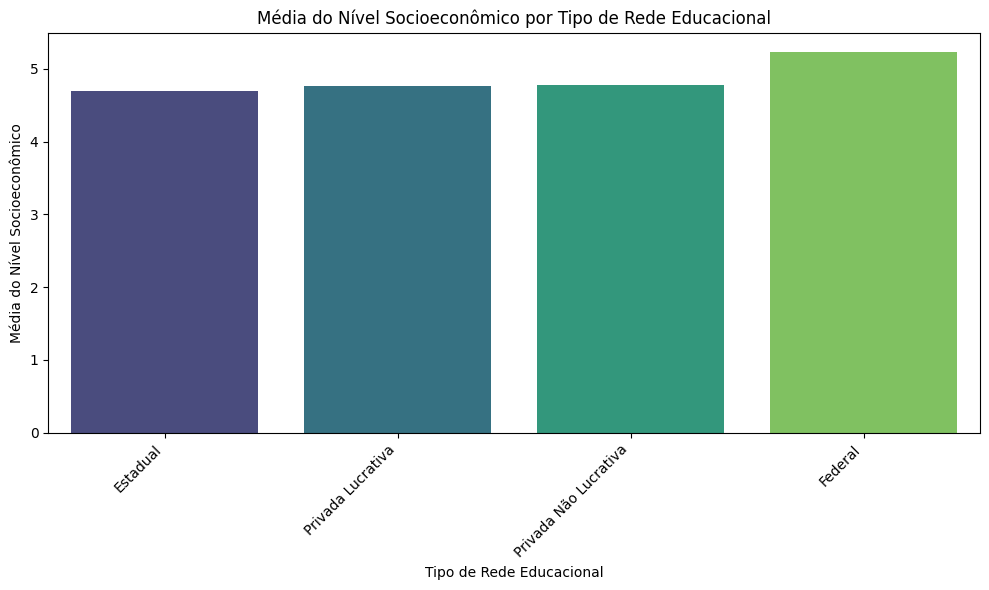

In [45]:
if 'TIPO_REDE_NOME' in df_tratado.columns:
    media_inse_por_rede = df_tratado.groupby('TIPO_REDE_NOME')['MEDIA_INSE'].mean().sort_values()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=media_inse_por_rede.index, y=media_inse_por_rede.values, palette='viridis')
    plt.title('Média do Nível Socioeconômico por Tipo de Rede Educacional')
    plt.xlabel('Tipo de Rede Educacional')
    plt.ylabel('Média do Nível Socioeconômico')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    # Este bloco só será executado se a coluna 'TIPO_REDE_NOME' não existir
    media_inse_por_rede_codigo = df_tratado.groupby('TP_TIPO_REDE')['MEDIA_INSE'].mean().sort_values()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=media_inse_por_rede_codigo.index, y=media_inse_por_rede_codigo.values, palette='viridis')
    plt.title('Média do NívelSocioeconômico por Tipo de Rede Educacional (Código)')
    plt.xlabel('Código do Tipo de Rede Educacional')
    plt.ylabel('Média do Nível Socioeconômico')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [46]:
df_tratado.to_csv('inse_tratado.csv', index=False, encoding='utf-8')
print("\nDataFrame tratado exportado para 'inse_tratado.csv'")


DataFrame tratado exportado para 'inse_tratado.csv'
